In [1]:
library(ANCOMBC)
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(microViz)
library("ggpubr")

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.4
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.4     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
microViz version 0.12.7 - Copyright (C) 2021-2025 David Barnett
! Website: https://david-barnett.github.io/microViz
✔ Useful?  For cita

In [2]:
# Read in the 16S qza files and clean them up for phyloseq
ASVs <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/table-BacArc_resistada.qza")
ASVs <- ASVs$data # Extract the count data from list


# Convert taxonomy info to data frame with correct taxonomy labels

taxa_16S <- read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/taxonomy_resistada.qza")
taxa_16S <- taxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>% 

select(-Confidence) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) %>%
filter(Phylum !=" p__Chlorophyta") %>%
filter(Phylum !="NA")
tree_file <-read_qza("/Users/stephanie.rosales/Documents/omics_projects/Resitada/qiime_output/rooted-BacArc_resistada.qza")$data

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 5374 rows [3, 6, 9, 11,
12, 14, 15, 16, 17, 18, 22, 23, 27, 31, 36, 38, 42, 45, 49, 51, ...].”


In [3]:
meta = read.csv("/Users/stephanie.rosales/Documents/omics_projects/Resitada/metadata_RESISTADA.csv", 
                header = T, row.names = 1,
na.strings = c("", "NA")) %>% 
mutate(
  Genotype = Genotype %>%
    str_replace_all("Kelsey-1", "Kelsey1") %>%
    str_replace_all("Cooper-9", "Cooper9")
)

# arrange labels
meta$Genotype<-factor(meta$Genotype, 
                              levels=c("FM19", "FM6", "FM9", "U44",
                                       "FM14", "Elkhorn","K2",
                                      "Acerv2", "Kelsey1", "Cooper9"))

meta$Combo<-factor(meta$Combo, 
                              levels=c("Ambient_Placebo", "NH4_Placebo", "Ambient_Pathogen", "NH4_Pathogen" ))



In [4]:
#make ps object
ps= phyloseq(otu_table(ASVs, taxa_are_rows= T),
tax_table(as.data.frame(taxa_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(meta), tree_file)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 280 samples ]
sample_data() Sample Data:       [ 280 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [5]:
#Clean data
#remove samples sequenced twice
dups = c("N169_256_R2", "N157_265_R2", "N165_296_R2", "N161_A067_R2", "N185_A088_R2",
                                 "N164_A089_R2","N119_A107","N267_A110","N7_A114", "N156_A115","N158_A116",
                                 "N101_A118","N160_A119","N277_A125")

ps = subset_samples(ps, !ID %in% dups & Genotype!=c("U41"))
                                                    
ps


ps=subset_taxa(ps, Phylum!="NA")
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 252 samples ]
sample_data() Sample Data:       [ 252 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [6]:
#subset data
ps_Clipped =subset_samples(ps, Type=="Clipped")
ps_Clipped

ps_paired = subset_samples(ps_Clipped, Pairs=="paired")
ps_paired

ps_both = subset_samples(ps_Clipped, filter_unpair=="no")
ps_both


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 192 samples ]
sample_data() Sample Data:       [ 192 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 151 samples ]
sample_data() Sample Data:       [ 151 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 9492 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 9492 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 9492 tips and 8365 internal nodes ]

In [7]:
#filter low counts
ps_both_fill = filter_taxa(ps_both, function(x) sum(x > 5) > (0.1*length(x)), TRUE) %>% tax_fix()
ps_both_fill
                           
sample_data(ps_both)$Combo <- factor(sample_data(ps_both)$Combo,
                                          levels = c("Ambient_Placebo", "NH4_Placebo", "Ambient_Pathogen", "NH4_Pathogen"))
                                                                                    

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 97 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 62 sample variables ]
tax_table()   Taxonomy Table:    [ 97 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 97 tips and 80 internal nodes ]

In [8]:
#check data
sample_data(ps_both) %>%
  group_by(Combo, Health) %>%
  summarize(count = n())

`summarise()` has grouped output by 'Combo'. You can override using the
`.groups` argument.


Combo,Health,count
<fct>,<chr>,<int>
Ambient_Placebo,AH,30
Ambient_Placebo,DL,1
NH4_Placebo,AH,43
NH4_Placebo,DL,21
Ambient_Pathogen,AH,8
Ambient_Pathogen,DL,22
NH4_Pathogen,AH,20
NH4_Pathogen,DL,29


In [9]:
#run ancomba
set.seed(123)
output = ancombc2(data = ps_both_fill , tax_level = "ASVs",
                  fix_formula = "Combo", 
                  rand_formula = "(1| Genotype)",
                  p_adj_method = "holm",  pairwise = TRUE,
                  group = "Combo",struc_zero = TRUE, alpha = 0.001,
                  n_cl=4, prv_cut = 0,
        
                  global = TRUE, dunnet = TRUE, trend = TRUE,
                  #lme_control = lme4::lmerControl(),
                   trend_control = list(
  contrast = list(
    diag(3),  # simple identity contrasts (you can define custom ones too)
    matrix(c(1, -1, 0,
             0, 1, -1,
             -1, 0, 1), nrow = 3, byrow = TRUE)
  ),
  node = list(1, 1),  # corresponds to each contrast above
  solver = "ECOS",
  B = 10
))
        

Checking the input data type ...

The input data is of type: phyloseq

PASS

Checking the sample metadata ...

The specified variables in the formula: Combo

The available variables in the sample metadata: sample_names, featurecounts, Initial_sample_ID, Tag, start_date, event_date, collection_date, Date, TimePoint, Replicate, Genotype, label, Nursery, Lat, Long, lat_long, organism, geo_loc_name, env_local_scale, env_broad_scale, env_medium, waterBody, countryCode, amplicon_sequenced, Nutrients, Diseased, Combo, Tank_N, Tank_D1, Tank_D2, Type, Health, Outcome, Notes, Severity, Survivorship, Pairs, filter_unpair, Combo_health, Archive_box, Genotype.1, NH4_Susceptibility, Disease_Susceptibility, NH4_Disease_Susceptibility, Expected, Surv_disease, Surv_nutrients, surv, std.err, barcode_label, barcode_seq, ID, Sequencing_Round, Plate_Name, Plate_Barcode, Well_Position, Sequence_Name, Illumina5_Adapter, Forward_Primer_Pad, Golay_Barcode, X515FB_Forward_Primer, Primer_For_PCR

PASS

Checking 

In [10]:
# Extract results
res_global <- output$res_global
res_pair <- output$res_pair

# Add taxonomy
taxa_df <- tax_table(ps_both_fill) %>% 
  as.data.frame() %>% 
  rownames_to_column("taxon")

res_global <- res_global %>%
  left_join(taxa_df, by = "taxon")

res_pair <- res_pair %>%
  left_join(taxa_df, by = "taxon")

taxon,color,lfc_ComboAmbient_Pathogen_ComboNH4_Placebo,lfc_ComboNH4_Pathogen_ComboNH4_Placebo,lfc_ComboNH4_Pathogen_ComboAmbient_Pathogen,passed_ss_ComboAmbient_Pathogen_ComboNH4_Placebo,passed_ss_ComboNH4_Pathogen_ComboNH4_Placebo,passed_ss_ComboNH4_Pathogen_ComboAmbient_Pathogen,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs,Comparison,LFC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
09f2b55ea4f56193699d46368ecbff40,aquamarine3,0.4561439,0.9035891,0.4474453,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,NH4_Pathogen - NH4_Placebo,0.90
09f2b55ea4f56193699d46368ecbff40,aquamarine3,0.4561439,0.9035891,0.4474453,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,Ambient_Pathogen - NH4_Placebo,0.46
09f2b55ea4f56193699d46368ecbff40,aquamarine3,0.4561439,0.9035891,0.4474453,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,NH4_Pathogen - Ambient_Pathogen,0.45
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,0.1283834,0.4531348,0.3247513,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,NH4_Pathogen - NH4_Placebo,0.45
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,0.1283834,0.4531348,0.3247513,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,NH4_Pathogen - Ambient_Pathogen,0.32
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,0.1283834,0.4531348,0.3247513,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,Ambient_Pathogen - NH4_Placebo,0.13


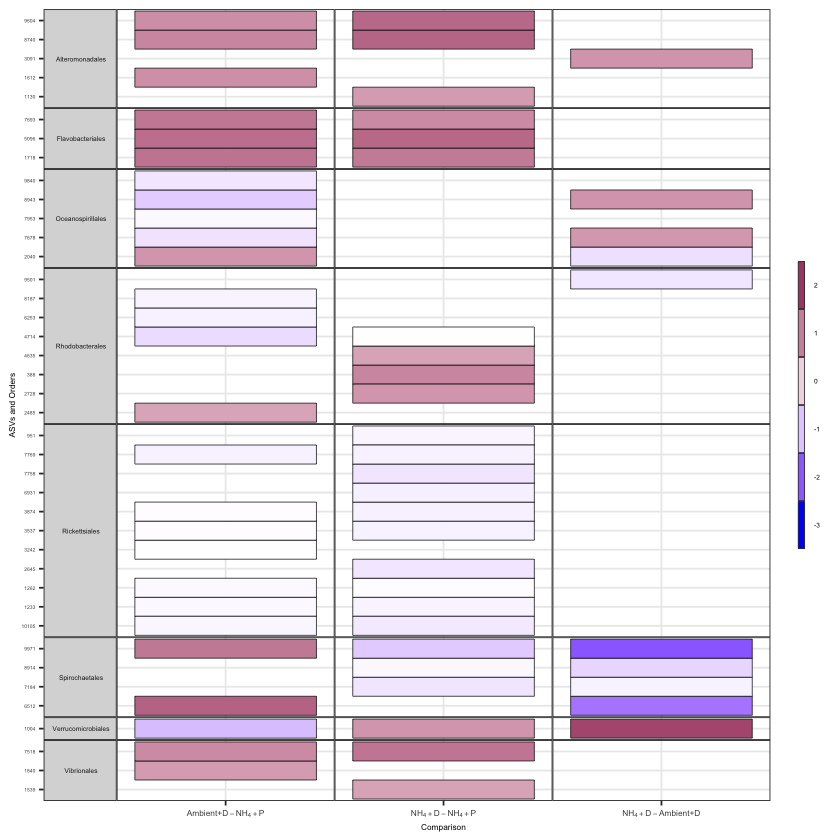

In [11]:


#Add taxonomy to global results
res_global <- output$res_global
taxa_df <- tax_table(ps_both_fill) %>%
  as.data.frame() %>%
  rownames_to_column("taxon")

df_global <- res_global %>%
  left_join(taxa_df, by = "taxon")

# Add taxonomy to pairwise result
res_pair <- output$res_pair
df_fig_global <- res_pair %>%
  dplyr::select(taxon,
                lfc_ComboAmbient_Pathogen_ComboNH4_Placebo,
                lfc_ComboNH4_Pathogen_ComboNH4_Placebo,
                lfc_ComboNH4_Pathogen_ComboAmbient_Pathogen,
                passed_ss_ComboAmbient_Pathogen_ComboNH4_Placebo,
                passed_ss_ComboNH4_Pathogen_ComboNH4_Placebo,
                passed_ss_ComboNH4_Pathogen_ComboAmbient_Pathogen) %>%
  left_join(taxa_df, by = "taxon") %>%
  dplyr::mutate(
    `Ambient_Pathogen - NH4_Placebo` = round(lfc_ComboAmbient_Pathogen_ComboNH4_Placebo, 2),
    `NH4_Pathogen - NH4_Placebo` = round(lfc_ComboNH4_Pathogen_ComboNH4_Placebo, 2),
    `NH4_Pathogen - Ambient_Pathogen` = round(lfc_ComboNH4_Pathogen_ComboAmbient_Pathogen, 2),
    color = ifelse(
      passed_ss_ComboAmbient_Pathogen_ComboNH4_Placebo == 1 |
        passed_ss_ComboNH4_Pathogen_ComboNH4_Placebo == 1 |
        passed_ss_ComboNH4_Pathogen_ComboAmbient_Pathogen == 1,
      "aquamarine3", "black")
  ) %>%
  dplyr::select(taxon,
                `Ambient_Pathogen - NH4_Placebo`,
                `NH4_Pathogen - NH4_Placebo`,
                `NH4_Pathogen - Ambient_Pathogen`,
                color,
                everything()) %>%
  tidyr::pivot_longer(cols = c(`Ambient_Pathogen - NH4_Placebo`,
                                `NH4_Pathogen - NH4_Placebo`,
                                `NH4_Pathogen - Ambient_Pathogen`),
                      names_to = "Comparison",
                      values_to = "LFC") %>%
  arrange(taxon)




head(df_fig_global) %>%
arrange(-LFC)



# 5. Plot
df_fig_global$Comparison <- factor(df_fig_global$Comparison,
                                   levels = c("Ambient_Pathogen - NH4_Placebo",
                                              "NH4_Pathogen - NH4_Placebo",
                                              "NH4_Pathogen - Ambient_Pathogen"))

lo <- floor(min(df_fig_global$LFC, na.rm = TRUE))
up <- ceiling(max(df_fig_global$LFC, na.rm = TRUE))
mid <- (lo + up)/2




fig_global <- df_fig_global %>%
filter(LFC < -0.5 | LFC > 0.5)  %>%
#filter (LFC!=0) %>%
mutate(across(where(is.character), ~ str_replace_all(.x, "o__", ""))) %>%
mutate(across(where(is.character), ~ str_replace_all(.x, "ASV_", ""))) %>%
mutate(across(where(is.character), ~ str_replace_all(.x, "_Placebo", "Placebo"))) %>%
ggplot(aes(x = Comparison, y = ASVs, fill = LFC)) +
  geom_tile(color = "black") +
  scale_fill_gradient2(low = "blue", high = "#AA4A74", mid = "white",
                       na.value = "white", 
                       midpoint = mid,
                       limit = c(lo, up),
                       name = NULL) +

  #geom_text(aes(label = LFC), color = "black", size = 4) +
  #labs(x = NULL, y = NULL, title = "Log fold changes for globally significant taxa") +
  theme_bw() +

  facet_grid(Order~Comparison, 
            space = "free" ,
             scales = "free",
             switch = "y"
            ) +
guides(fill = guide_legend(reverse = TRUE, 
                             barwidth = 0.3, 
                             barheight = 2)) +

  theme(
    axis.title.x = element_text(size = 5),
    axis.title.y = element_text(size = 5),
     axis.text.x = element_text(size=5),
      axis.text.y = element_text(size=3),
    legend.text = element_text(size = 4),
    legend.title = element_text(size = 4), 
      strip.text.y.left = element_text(angle = 0, size=4),
      strip.text.x = element_blank(),
        panel.spacing.x = unit(0.0, "lines"),
    panel.spacing.y = unit(0.0, "lines")
  ) +
scale_x_discrete(labels = c(
  "Ambient_Pathogen - NH4_Placebo" = expression("Ambient+D" - NH[4] + P),
  "NH4_Pathogen - NH4_Placebo" = expression(NH[4] + D - NH[4] + P),
  "NH4_Pathogen - Ambient_Pathogen" = expression(NH[4] + D - "Ambient+D")
)) +
ylab("ASVs and Orders")

             
print(fig_global)

ggsave("/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/SuppFig6.png", 
      width = 4, height = 4, units = "in", dpi=300)

In [12]:
head(df_fig_global)
df_fig_global= df_fig_global  %>%
filter(LFC < -0.5 | LFC > 0.5) 
write_csv(df_fig_global, "/Users/stephanie.rosales/Documents/omics_projects/Resitada/figures/ANCOM_pairwise.csv")

taxon,color,lfc_ComboAmbient_Pathogen_ComboNH4_Placebo,lfc_ComboNH4_Pathogen_ComboNH4_Placebo,lfc_ComboNH4_Pathogen_ComboAmbient_Pathogen,passed_ss_ComboAmbient_Pathogen_ComboNH4_Placebo,passed_ss_ComboNH4_Pathogen_ComboNH4_Placebo,passed_ss_ComboNH4_Pathogen_ComboAmbient_Pathogen,Kingdom,Phylum,Class,Order,Family,Genus,Species,ASVs,Comparison,LFC
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
09f2b55ea4f56193699d46368ecbff40,aquamarine3,0.4561439,0.9035891,0.4474453,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,Ambient_Pathogen - NH4_Placebo,0.46
09f2b55ea4f56193699d46368ecbff40,aquamarine3,0.4561439,0.9035891,0.4474453,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,NH4_Pathogen - NH4_Placebo,0.90
09f2b55ea4f56193699d46368ecbff40,aquamarine3,0.4561439,0.9035891,0.4474453,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_388,NH4_Pathogen - Ambient_Pathogen,0.45
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,0.1283834,0.4531348,0.3247513,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,Ambient_Pathogen - NH4_Placebo,0.13
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,0.1283834,0.4531348,0.3247513,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,NH4_Pathogen - NH4_Placebo,0.45
0dac61f4ff220705ae63e2398585ee5c,aquamarine3,0.1283834,0.4531348,0.3247513,TRUE,TRUE,TRUE,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,f__Rhodobacteraceae Family,f__Rhodobacteraceae Family,ASV_552,NH4_Pathogen - Ambient_Pathogen,0.32


In [13]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: aarch64-apple-darwin20
Running under: macOS Sequoia 15.6.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.5-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.1

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggpubr_0.6.0      microViz_0.12.7   lubridate_1.9.4   forcats_1.0.0    
 [5] stringr_1.5.1     dplyr_1.1.4       purrr_1.0.4       readr_2.1.5      
 [9] tidyverse_2.0.0   microbiome_1.30.0 phyloseq_1.52.0   ggplot2_4.0.0    
[13] tibble_3.3.0      tidyr_1.3.1       qiime2R_0.99.6    ANCOMBC_2.10.0   

loaded via a namespace (and not attached):
  [1] RColorBrewer_1.1-3      rstudioapi_0.17.1       jsonlite_2.0